# 3. Hands on Reinforcement Learning

## 3.3 Off-policy Monte-Carlo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('text', usetex = True) # to use LaTeX

import gym
import numpy as np
from collections import defaultdict
from utils import plot_state_values
from utils import plot_policy

In [3]:
env = gym.make('Blackjack-v0')

### Off-policy Monte-Carlo for $Q \approx q_{\pi}$

In [8]:
def QtoV(Q):
    return {state: np.max(values) for state, values in Q.items()}

In [9]:
def generate_episode_from_behavior_policy(env, b):
    state = env.reset()
    episode = []
    while True:
        probs = b(state) # probability of each action a
        action = np.random.choice(np.arange(len(probs)), p=probs)
        next_state, reward, terminate, _ = env.step(action)
        episode.append((state, action, reward))
        if terminate:
            break
            
        state = next_state
    
    return episode

In [10]:
def random_policy(n_actions):
    actions = np.ones(n_actions) / n_actions
    
    def policy(state):
        return actions
        
    return policy

In [11]:
def MCQ_off(env, generate_episode, gamma, episodes):
    n_actions = env.action_space.n
    
    # initialize arbitrarily Q and C, pi
    Q = defaultdict(lambda: np.zeros(n_actions))
    C = defaultdict(lambda: np.zeros(n_actions))
    pi = {}
    
    # uniformly random policy is a soft policy
    b = random_policy(n_actions)
    
    for episode in range(episodes):
        trajectory = generate_episode(env, b)
        G, T = 0, len(trajectory)
        W = 1
        for i in range(T-1, -1, -1):
            state, action, reward = trajectory[i]
            G = gamma * G + reward
            
            C[state][action] += W
                       
            Q[state][action] += W/C[state][action] * (G - Q[state][action])
            pi[state] = np.argmax(Q[state])
            
            if action != pi[state]:
                break

            W = W / b(state)[action]
                
    return Q, pi

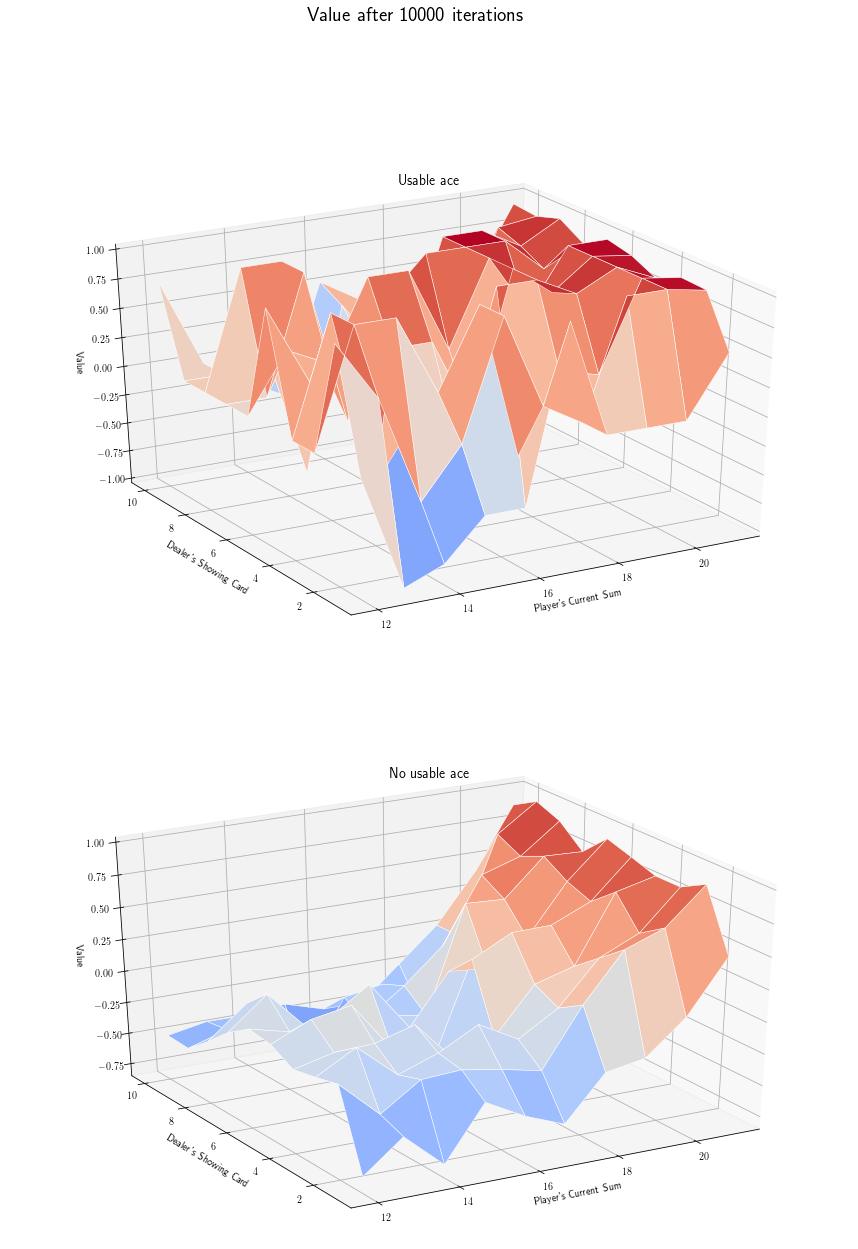

In [12]:
n_episodes = 10000
Q, pi = MCQ_off(env, generate_episode_from_behavior_policy,
                1.0, n_episodes)
V = QtoV(Q)
plot_state_values(V, n_episodes)

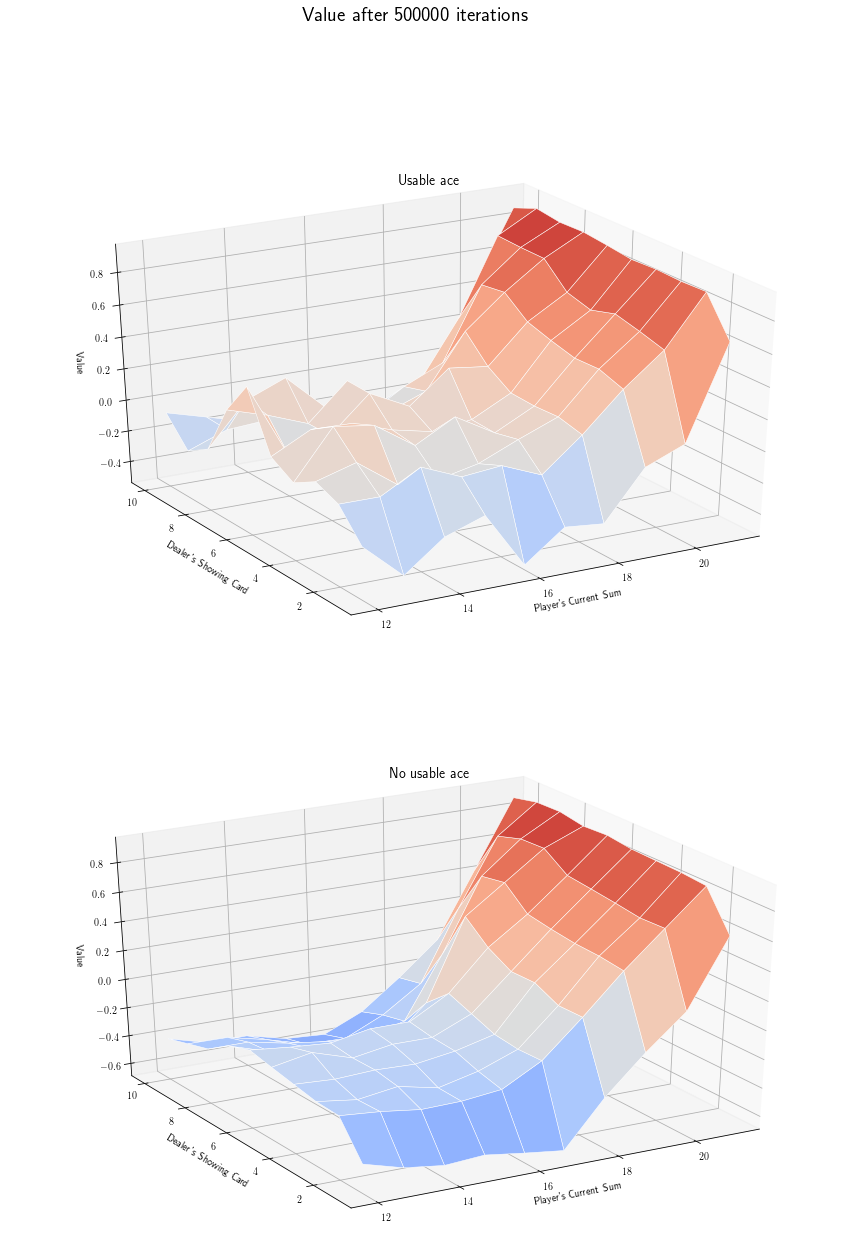

In [13]:
n_episodes = 500000
Q, pi = MCQ_off(env, generate_episode_from_behavior_policy,
                1.0, n_episodes)
V = QtoV(Q)
plot_state_values(V, n_episodes)

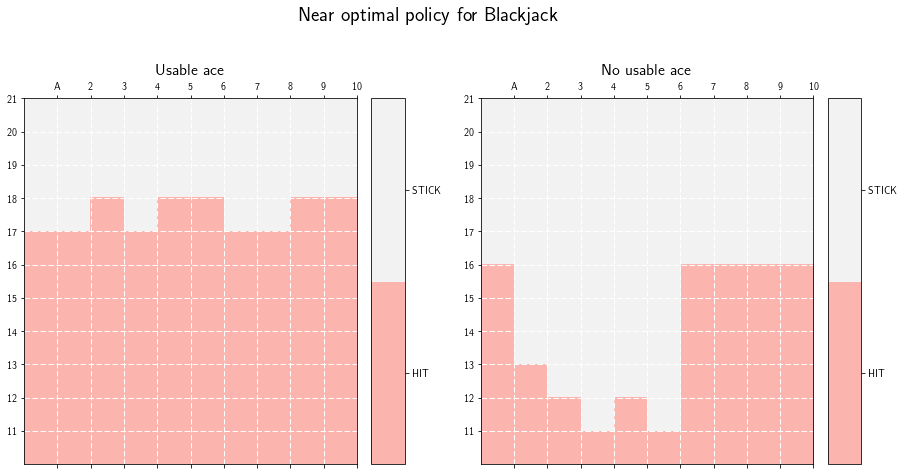

In [14]:
plot_policy(pi, "Near optimal policy for Blackjack")